# Smart Queue Monitoring System - Manufacturing Scenario

## Overview
Now that you have your Python script and job submission script, you're ready to request an **IEI Tank-870** edge node and run inference on the different hardware types (CPU, GPU, VPU, FPGA).

After the inference is completed, the output video and stats files need to be retrieved and stored in the workspace, which can then be viewed within the Jupyter Notebook.

## Objectives
* Submit inference jobs to Intel's DevCloud using the `qsub` command.
* Retrieve and review the results.
* After testing, go back to the proposal doc and update your original proposed hardware device.

## Step 0: Set Up

#### IMPORTANT: Set up paths so we can run Dev Cloud utilities
You *must* run this every time you enter a Workspace session.
(Tip: select the cell and use **Shift+Enter** to run the cell.)

In [1]:
%env PATH=/opt/conda/bin:/opt/spark-2.4.3-bin-hadoop2.7/bin:/opt/conda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/opt/intel_devcloud_support
import os
import sys
sys.path.insert(0, os.path.abspath('/opt/intel_devcloud_support'))
sys.path.insert(0, os.path.abspath('/opt/intel'))

env: PATH=/opt/conda/bin:/opt/spark-2.4.3-bin-hadoop2.7/bin:/opt/conda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/opt/intel_devcloud_support


In [2]:
! ls

config_git.txt			    queue_job.sh
Create_Job_Submission_Script.ipynb  results
Create_Python_Script.ipynb	    Retail_Scenario.ipynb
Manufacturing_Scenario.ipynb	    stderr.log
original_videos			    stdout.log
output.tgz			    Transportation_Scenario.ipynb
person_detect.py


### Step 0.1:  (Optional-step): Original Video

If you are curious to see the input video, run the following cell to view the original video stream we'll be using for inference.

In [24]:
import videoHtml
videoHtml.videoHTML('Manufacturing', ['original_videos/Manufacturing.mp4'])

## Step 1 : Inference on a Video

In the next few cells, You'll submit your job using the `qsub` command and retrieve the results for each job. Each of the cells below should submit a job to different edge compute nodes.

The output of the cell is the `JobID` of your job, which you can use to track progress of a job with `liveQStat`.

You will need to submit a job for each of the following hardware types:
* **CPU**
* **GPU**
* **VPU**
* **FPGA**

**Note:** You will have to submit each job one at a time and retrieve their results. 

After submission, they will go into a queue and run as soon as the requested compute resources become available. 
(Tip: **shift+enter** will run the cell and automatically move you to the next cell.)

If your job successfully runs and completes, once you retrieve your results, it should output a video and a stats text file in the `results/manufacturing/<DEVICE>` directory.

For example, your **CPU** job should output its files in this directory:
> **results/manufacturing/cpu**

**Note**: To get the queue labels for the different hardware devices, you can go to [this link](https://devcloud.intel.com/edge/get_started/devcloud/).

The following arguments should be passed to the job submission script after the `-F` flag:
* Model path - `/data/models/intel/person-detection-retail-0013/<MODEL PRECISION>/`. You will need to adjust this path based on the model precision being using on the hardware.
* Device - `CPU`, `GPU`, `MYRIAD`, `HETERO:FPGA,CPU`.
* Manufacturing video path - `/data/resources/manufacturing.mp4`.
* Manufacturing queue_param file path - `/data/queue_param/manufacturing.npy`.
* Output path - `/output/results/manufacturing/<DEVICE>` This should be adjusted based on the device used in the job.
* Max num of people - This is the max number of people in queue before the system would redirect them to another queue.

## Step 1.1: Submit to an Edge Compute Node with an Intel CPU
In the cell below, write a script to submit a job to an <a 
    href="https://software.intel.com/en-us/iot/hardware/iei-tank-dev-kit-core">IEI 
    Tank* 870-Q170</a> edge node with an <a 
    href="https://ark.intel.com/products/88186/Intel-Core-i5-6500TE-Processor-6M-Cache-up-to-3-30-GHz-">Intel Core™ i5-6500TE processor</a>. The inference workload should run on the CPU.

In [3]:
#Submit job to the queue
cpu_job_id = !qsub queue_job.sh -d . -l nodes=1:tank-870:i5-6500te -F "/data/models/intel/person-detection-retail-0013/FP32/person-detection-retail-0013 CPU /data/resources/manufacturing.mp4 /data/queue_param/manufacturing.npy /output/results/manufacturing/CPU 5"

print(cpu_job_id[0])

g5o117aNnTzP3UdHIyHs99vgDxhPBCxO


#### Check Job Status

To check on the job that was submitted, use `liveQStat` to check the status of the job.

Column `S` shows the state of your running jobs.

For example:
- If `JOB ID`is in Q state, it is in the queue waiting for available resources.
- If `JOB ID` is in R state, it is running.

In [26]:
import liveQStat
liveQStat.liveQStat()

#### Get Results

Run the next cell to retrieve your job's results.

In [4]:
import get_results
get_results.getResults(cpu_job_id[0], filename='output.tgz', blocking=True)

getResults() is blocking until results of the job (id:g5o117aNnTzP3UdHIyHs99vgDxhPBCxO) are ready.
Please wait.............................................Success!
output.tgz was downloaded in the same folder as this notebook.


#### Unpack your output files and view stdout.log

In [5]:
!tar zxf output.tgz

In [6]:
!cat stdout.log

counter : 1
inside predict
got processed image
started async request
request completed #121
got result
inside predict for 
indide predict if
got coordinates
append coordinates
inside draw output
xmin 593, xmax 869, ymin 265, ymax 937 
assigned values
drawn rectangle
drawn output
inside predict for 
indide predict if
got coordinates
append coordinates
inside draw output
xmin 972, xmax 1279, ymin 236, ymax 886 
assigned values
drawn rectangle
drawn output
inside predict for 
indide predict if
got coordinates
append coordinates
inside draw output
xmin 96, xmax 424, ymin 280, ymax 1051 
assigned values
drawn rectangle
drawn output
inside predict for 
indide predict if
got coordinates
append coordinates
inside draw output
xmin 1281, xmax 1492, ymin 260, ymax 832 
assigned values
drawn rectangle
drawn output
inside predict for 
indide predict if
got coordinates
append coordinates
inside draw output
xmin 1534, xmax 1773, ymin 270, ymax 745 
assigned values
drawn rectangle
drawn output
inside 

inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 


inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 


inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
got coords, image
got num_people
Total People in frame = 8
Number of people in queue = {1: 1, 2: 2}
inside #1 for
got out text: No. of People in Queue 1 is 1 
putted text
inside #1 for
got out text: No. of People in Queue 2 is 2 
putted text
written image
counter : 70
inside predict
got processed image
started async request
request completed #121
got result
inside predict for 
indide predict if
got coordinates
append coordinates
inside draw output
xmin 971, xmax 1277, ymin 238, ymax 883 
assigned values
drawn rectangle
drawn output
inside predict for 
indide predict if
got coordinates
append coordinates
inside draw output
xmin 603, xmax 861, ymin 266, ymax 962 
assigned values
drawn rectangle
drawn output
inside predict for 
indide predict if
got coordinates
append coordinates
inside draw output
xmin 83, xmax 433, ymin 291, ymax

inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 


got coordinates
append coordinates
inside draw output
xmin 593, xmax 857, ymin 264, ymax 954 
assigned values
drawn rectangle
drawn output
inside predict for 
indide predict if
got coordinates
append coordinates
inside draw output
xmin 1019, xmax 1293, ymin 233, ymax 868 
assigned values
drawn rectangle
drawn output
inside predict for 
indide predict if
got coordinates
append coordinates
inside draw output
xmin 101, xmax 426, ymin 287, ymax 1048 
assigned values
drawn rectangle
drawn output
inside predict for 
indide predict if
got coordinates
append coordinates
inside draw output
xmin 1277, xmax 1504, ymin 244, ymax 837 
assigned values
drawn rectangle
drawn output
inside predict for 
indide predict if
got coordinates
append coordinates
inside draw output
xmin 1537, xmax 1773, ymin 271, ymax 737 
assigned values
drawn rectangle
drawn output
inside predict for 
indide predict if
got coordinates
append coordinates
inside draw output
xmin 1797, xmax 1918, ymin 247, ymax 609 
assigned val

inside predict for 
indide predict if
got coordinates
append coordinates
inside draw output
xmin 1533, xmax 1772, ymin 277, ymax 740 
assigned values
drawn rectangle
drawn output
inside predict for 
indide predict if
got coordinates
append coordinates
inside draw output
xmin 1436, xmax 1548, ymin 262, ymax 640 
assigned values
drawn rectangle
drawn output
inside predict for 
indide predict if
got coordinates
append coordinates
inside draw output
xmin 1311, xmax 1353, ymin 241, ymax 352 
assigned values
drawn rectangle
drawn output
inside predict for 
indide predict if
got coordinates
append coordinates
inside draw output
xmin 1765, xmax 1923, ymin 263, ymax 616 
assigned values
drawn rectangle
drawn output
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
insi

inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 


append coordinates
inside draw output
xmin 1803, xmax 1882, ymin 206, ymax 391 
assigned values
drawn rectangle
drawn output
inside predict for 
indide predict if
got coordinates
append coordinates
inside draw output
xmin 1209, xmax 1236, ymin 254, ymax 319 
assigned values
drawn rectangle
drawn output
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict f

inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 


counter : 237
inside predict
got processed image
started async request
request completed #121
got result
inside predict for 
indide predict if
got coordinates
append coordinates
inside draw output
xmin 595, xmax 846, ymin 255, ymax 951 
assigned values
drawn rectangle
drawn output
inside predict for 
indide predict if
got coordinates
append coordinates
inside draw output
xmin 87, xmax 435, ymin 292, ymax 1056 
assigned values
drawn rectangle
drawn output
inside predict for 
indide predict if
got coordinates
append coordinates
inside draw output
xmin 1279, xmax 1490, ymin 249, ymax 832 
assigned values
drawn rectangle
drawn output
inside predict for 
indide predict if
got coordinates
append coordinates
inside draw output
xmin 1048, xmax 1289, ymin 244, ymax 863 
assigned values
drawn rectangle
drawn output
inside predict for 
indide predict if
got coordinates
append coordinates
inside draw output
xmin 1531, xmax 1773, ymin 274, ymax 740 
assigned values
drawn rectangle
drawn output
insi

inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 


#### View stderr.log
This can be used for debugging.

In [7]:
!cat stderr.log

person_detect.py:48: DeprecationWarning: Reading network using constructor is deprecated. Please, use IECore.read_network() method instead
  self.model=IENetwork(self.model_structure, self.model_weights)


#### View Output Video
Run the cell below to view the output video. If inference was successfully run, you should see a video with bounding boxes drawn around each person detected.

In [38]:
import videoHtml

videoHtml.videoHTML('Manufacturing CPU', ['results/manufacturing/CPU/output_video.mp4'])

## Step 1.2: Submit to an Edge Compute Node with CPU and IGPU
In the cell below, write a script to submit a job to an <a 
    href="https://software.intel.com/en-us/iot/hardware/iei-tank-dev-kit-core">IEI 
    Tank* 870-Q170</a> edge node with an <a href="https://ark.intel.com/products/88186/Intel-Core-i5-6500TE-Processor-6M-Cache-up-to-3-30-GHz-">Intel® Core i5-6500TE</a>. The inference workload should run on the **Intel® HD Graphics 530** integrated GPU.

In [8]:
#Submit job to the queue
gpu_job_id = !qsub queue_job.sh -d . -l nodes=1:tank-870:i5-6500te -F "/data/models/intel/person-detection-retail-0013/FP32/person-detection-retail-0013 GPU /data/resources/manufacturing.mp4 /data/queue_param/manufacturing.npy /output/results/manufacturing/GPU 5"

print(gpu_job_id[0])

rVl4rjUt4TuHTt9gxlFtyy58WHKbwOGS


### Check Job Status

To check on the job that was submitted, use `liveQStat` to check the status of the job.

Column `S` shows the state of your running jobs.

For example:
- If `JOB ID`is in Q state, it is in the queue waiting for available resources.
- If `JOB ID` is in R state, it is running.

In [ ]:
import liveQStat
liveQStat.liveQStat()

#### Get Results

Run the next cell to retrieve your job's results.

In [9]:
import get_results
get_results.getResults(gpu_job_id[0], filename='output.tgz', blocking=True)

getResults() is blocking until results of the job (id:rVl4rjUt4TuHTt9gxlFtyy58WHKbwOGS) are ready.
Please wait............................................................................................Success!
output.tgz was downloaded in the same folder as this notebook.


#### Unpack your output files and view stdout.log

In [10]:
!tar zxf output.tgz

In [11]:
!cat stdout.log

counter : 1
inside predict
got processed image
started async request
request completed #121
got result
inside predict for 
indide predict if
got coordinates
append coordinates
inside draw output
xmin 593, xmax 869, ymin 265, ymax 937 
assigned values
drawn rectangle
drawn output
inside predict for 
indide predict if
got coordinates
append coordinates
inside draw output
xmin 972, xmax 1279, ymin 236, ymax 886 
assigned values
drawn rectangle
drawn output
inside predict for 
indide predict if
got coordinates
append coordinates
inside draw output
xmin 96, xmax 424, ymin 280, ymax 1051 
assigned values
drawn rectangle
drawn output
inside predict for 
indide predict if
got coordinates
append coordinates
inside draw output
xmin 1281, xmax 1492, ymin 260, ymax 832 
assigned values
drawn rectangle
drawn output
inside predict for 
indide predict if
got coordinates
append coordinates
inside draw output
xmin 1534, xmax 1773, ymin 270, ymax 745 
assigned values
drawn rectangle
drawn output
inside 

inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 


xmin 1529, xmax 1767, ymin 278, ymax 737 
assigned values
drawn rectangle
drawn output
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predic

drawn output
inside predict for 
indide predict if
got coordinates
append coordinates
inside draw output
xmin 1280, xmax 1489, ymin 260, ymax 827 
assigned values
drawn rectangle
drawn output
inside predict for 
indide predict if
got coordinates
append coordinates
inside draw output
xmin 1530, xmax 1766, ymin 277, ymax 737 
assigned values
drawn rectangle
drawn output
inside predict for 
indide predict if
got coordinates
append coordinates
inside draw output
xmin 1838, xmax 1920, ymin 270, ymax 613 
assigned values
drawn rectangle
drawn output
inside predict for 
indide predict if
got coordinates
append coordinates
inside draw output
xmin 1429, xmax 1553, ymin 267, ymax 645 
assigned values
drawn rectangle
drawn output
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside pred

inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
got coords, image
got num_people
Total People in frame = 7
Number of people in queue = {1: 1, 2: 1}
inside #1 for
got out text: No. of People in Queue 1 is 1 
putted text
inside #1 for
got out text: No. of People in Queue 2 is 1 
putted text
written image
counter : 94
inside predict
got processed image
started async request
request completed #121
got result
inside predict for 
indide predict if
got coordinates
append coordinates
inside draw output
xmin 594, xmax 861, ymin 257, ymax 950 
assigned values
drawn rectan

inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 


inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 


inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 


inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 


inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 


inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
got coords, image
got num_people
Total People in frame = 8
Number of people in queue = {1: 1, 2: 1}
inside #1 for
got out text: No. of People in Queue 1 is 1 
putted text
inside #1

inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 


#### View stderr.log
This can be used for debugging.

In [12]:
!cat stderr.log

person_detect.py:48: DeprecationWarning: Reading network using constructor is deprecated. Please, use IECore.read_network() method instead
  self.model=IENetwork(self.model_structure, self.model_weights)


#### View Output Video
Run the cell below to view the output video. If inference was successfully run, you should see a video with bounding boxes drawn around each person detected.

In [ ]:
import videoHtml

videoHtml.videoHTML('Manufacturing GPU', ['results/manufacturing/GPU/output_video.mp4'])

## Step 1.3: Submit to an Edge Compute Node with a Neural Compute Stick 2
In the cell below, write a script to submit a job to an <a 
    href="https://software.intel.com/en-us/iot/hardware/iei-tank-dev-kit-core">IEI 
    Tank 870-Q170</a> edge node with an <a href="https://ark.intel.com/products/88186/Intel-Core-i5-6500TE-Processor-6M-Cache-up-to-3-30-GHz-">Intel Core i5-6500te CPU</a>. The inference workload should run on an <a 
    href="https://software.intel.com/en-us/neural-compute-stick">Intel Neural Compute Stick 2</a> installed in this  node.

In [44]:
#Submit job to the queue
vpu_job_id = !qsub queue_job.sh -d . -l nodes=1:tank-870:i5-6500te:intel-ncs2 -F "/data/models/intel/person-detection-retail-0013/FP16/person-detection-retail-0013 MYRIAD /data/resources/manufacturing.mp4 /data/queue_param/manufacturing.npy /output/results/manufacturing/VPU 5"

print(vpu_job_id[0])

Hzp3d1NJI7qUrayOfsKuqVjpdS3wdhSN


### Check Job Status

To check on the job that was submitted, use `liveQStat` to check the status of the job.

Column `S` shows the state of your running jobs.

For example:
- If `JOB ID`is in Q state, it is in the queue waiting for available resources.
- If `JOB ID` is in R state, it is running.

In [ ]:
import liveQStat
liveQStat.liveQStat()

#### Get Results

Run the next cell to retrieve your job's results.

In [45]:
import get_results
get_results.getResults(vpu_job_id[0], filename='output.tgz', blocking=True)

getResults() is blocking until results of the job (id:Hzp3d1NJI7qUrayOfsKuqVjpdS3wdhSN) are ready.
Please wait.....................................................................Success!
output.tgz was downloaded in the same folder as this notebook.


#### Unpack your output files and view stdout.log

In [46]:
!tar zxf output.tgz

In [47]:
!cat stdout.log

counter : 1
inside predict
got processed image
started async request
request completed #121
got result
inside predict for 
indide predict if
got coordinates
append coordinates
inside draw output
xmin 592, xmax 869, ymin 264, ymax 936 
assigned values
drawn rectangle
drawn output
inside predict for 
indide predict if
got coordinates
append coordinates
inside draw output
xmin 973, xmax 1280, ymin 235, ymax 886 
assigned values
drawn rectangle
drawn output
inside predict for 
indide predict if
got coordinates
append coordinates
inside draw output
xmin 96, xmax 424, ymin 280, ymax 1052 
assigned values
drawn rectangle
drawn output
inside predict for 
indide predict if
got coordinates
append coordinates
inside draw output
xmin 1281, xmax 1491, ymin 259, ymax 831 
assigned values
drawn rectangle
drawn output
inside predict for 
indide predict if
got coordinates
append coordinates
inside draw output
xmin 1534, xmax 1772, ymin 270, ymax 744 
assigned values
drawn rectangle
drawn output
inside 

indide predict if
got coordinates
append coordinates
inside draw output
xmin 93, xmax 424, ymin 281, ymax 1058 
assigned values
drawn rectangle
drawn output
inside predict for 
indide predict if
got coordinates
append coordinates
inside draw output
xmin 1275, xmax 1504, ymin 251, ymax 838 
assigned values
drawn rectangle
drawn output
inside predict for 
indide predict if
got coordinates
append coordinates
inside draw output
xmin 1532, xmax 1767, ymin 274, ymax 737 
assigned values
drawn rectangle
drawn output
inside predict for 
indide predict if
got coordinates
append coordinates
inside draw output
xmin 1728, xmax 1833, ymin 266, ymax 573 
assigned values
drawn rectangle
drawn output
inside predict for 
indide predict if
got coordinates
append coordinates
inside draw output
xmin 1783, xmax 1910, ymin 257, ymax 604 
assigned values
drawn rectangle
drawn output
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside 

got coordinates
append coordinates
inside draw output
xmin 596, xmax 889, ymin 266, ymax 945 
assigned values
drawn rectangle
drawn output
inside predict for 
indide predict if
got coordinates
append coordinates
inside draw output
xmin 1010, xmax 1284, ymin 237, ymax 871 
assigned values
drawn rectangle
drawn output
inside predict for 
indide predict if
got coordinates
append coordinates
inside draw output
xmin 105, xmax 424, ymin 288, ymax 1044 
assigned values
drawn rectangle
drawn output
inside predict for 
indide predict if
got coordinates
append coordinates
inside draw output
xmin 1286, xmax 1488, ymin 259, ymax 828 
assigned values
drawn rectangle
drawn output
inside predict for 
indide predict if
got coordinates
append coordinates
inside draw output
xmin 1529, xmax 1769, ymin 277, ymax 740 
assigned values
drawn rectangle
drawn output
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside

inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
got coords, image
got num_people
Total People in frame = 7
Number of people in queue = {1: 1, 2: 1}


inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 


drawn output
inside predict for 
indide predict if
got coordinates
append coordinates
inside draw output
xmin 1275, xmax 1495, ymin 245, ymax 836 
assigned values
drawn rectangle
drawn output
inside predict for 
indide predict if
got coordinates
append coordinates
inside draw output
xmin 1533, xmax 1771, ymin 274, ymax 740 
assigned values
drawn rectangle
drawn output
inside predict for 
indide predict if
got coordinates
append coordinates
inside draw output
xmin 1801, xmax 1918, ymin 257, ymax 610 
assigned values
drawn rectangle
drawn output
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside pre

inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 


inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
got coords, image
got num_people
Total People in frame = 6
Number of people in queue = {1: 1, 2: 1}
inside #1 for
got out text: No. of People in Queue 1 is 1 
putted text
inside #1 for
got out text: No. of People in Queue 2 is 1 
putted text
written image
counter : 169
inside predict
got processed image
started async request
request completed #121
got result
inside predict for 
indide predict if
got coordinates
append coordinates
inside draw output
xmin 603, xmax 866, ymin 273, ymax 957 
assigned values
drawn rectangle
drawn output
inside predict for 
indide predict if
got 

inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 


inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 


inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 


assigned values
drawn rectangle
drawn output
inside predict for 
indide predict if
got coordinates
append coordinates
inside draw output
xmin 976, xmax 1284, ymin 228, ymax 881 
assigned values
drawn rectangle
drawn output
inside predict for 
indide predict if
got coordinates
append coordinates
inside draw output
xmin 90, xmax 435, ymin 281, ymax 1057 
assigned values
drawn rectangle
drawn output
inside predict for 
indide predict if
got coordinates
append coordinates
inside draw output
xmin 1281, xmax 1499, ymin 251, ymax 832 
assigned values
drawn rectangle
drawn output
inside predict for 
indide predict if
got coordinates
append coordinates
inside draw output
xmin 1535, xmax 1770, ymin 276, ymax 734 
assigned values
drawn rectangle
drawn output
inside predict for 
indide predict if
got coordinates
append coordinates
inside draw output
xmin 1425, xmax 1547, ymin 254, ymax 644 
assigned values
drawn rectangle
drawn output
inside predict for 
inside predict for 
inside predict for 
ins

#### View stderr.log
This can be used for debugging.

In [48]:
!cat stderr.log

person_detect.py:48: DeprecationWarning: Reading network using constructor is deprecated. Please, use IECore.read_network() method instead
  self.model=IENetwork(self.model_structure, self.model_weights)


#### View Output Video
Run the cell below to view the output video. If inference was successfully run, you should see a video with bounding boxes drawn around each person detected.

In [49]:
import videoHtml

videoHtml.videoHTML('Manufacturing VPU', ['results/manufacturing/VPU/output_video.mp4'])

## Step 1.4: Submit to an Edge Compute Node with IEI Mustang-F100-A10
In the cell below, write a script to submit a job to an <a 
    href="https://software.intel.com/en-us/iot/hardware/iei-tank-dev-kit-core">IEI 
    Tank 870-Q170</a> edge node with an <a href="https://ark.intel.com/products/88186/Intel-Core-i5-6500TE-Processor-6M-Cache-up-to-3-30-GHz-">Intel Core™ i5-6500te CPU</a> . The inference workload will run on the <a href="https://www.ieiworld.com/mustang-f100/en/"> IEI Mustang-F100-A10 </a> FPGA card installed in this node.

In [33]:
#Submit job to the queue
fpga_job_id = !qsub queue_job.sh -d . -l nodes=1:tank-870:i5-6500te:iei-mustang-f100-a10 -F "/data/models/intel/person-detection-retail-0013/FP16/person-detection-retail-0013 HETERO:FPGA,CPU /data/resources/manufacturing.mp4 /data/queue_param/manufacturing.npy /output/results/manufacturing/FPGA 5"

print(fpga_job_id[0])

d4nxodi13f0kfAwJRZmofo203NjQPpP8


### Check Job Status

To check on the job that was submitted, use `liveQStat` to check the status of the job.

Column `S` shows the state of your running jobs.

For example:
- If `JOB ID`is in Q state, it is in the queue waiting for available resources.
- If `JOB ID` is in R state, it is running.

In [ ]:
import liveQStat
liveQStat.liveQStat()

#### Get Results

Run the next cell to retrieve your job's results.

In [34]:
import get_results
get_results.getResults(fpga_job_id[0], filename='output.tgz', blocking=True)

getResults() is blocking until results of the job (id:d4nxodi13f0kfAwJRZmofo203NjQPpP8) are ready.
Please wait...................................................................Success!
output.tgz was downloaded in the same folder as this notebook.


#### Unpack your output files and view stdout.log

In [35]:
!tar zxf output.tgz

In [36]:
!cat stdout.log

INTELFPGAOCLSDKROOT is not set
Using script's current directory (/opt/altera/aocl-pro-rte/aclrte-linux64)

aoc was not found, but aocl was found. Assuming only RTE is installed.

AOCL_BOARD_PACKAGE_ROOT is set to /opt/intel/openvino/bitstreams/a10_vision_design_sg2_bitstreams/BSP/a10_1150_sg2. Using that.
Adding /opt/altera/aocl-pro-rte/aclrte-linux64/bin to PATH
Adding /opt/altera/aocl-pro-rte/aclrte-linux64/linux64/lib to LD_LIBRARY_PATH
Adding /opt/altera/aocl-pro-rte/aclrte-linux64/host/linux64/lib to LD_LIBRARY_PATH
Adding /opt/intel/openvino/bitstreams/a10_vision_design_sg2_bitstreams/BSP/a10_1150_sg2/linux64/lib to LD_LIBRARY_PATH
aocl program: Running program from /opt/intel/openvino/bitstreams/a10_vision_design_sg2_bitstreams/BSP/a10_1150_sg2/linux64/libexec
Programming device: a10gx_2ddr : Intel Vision Accelerator Design with Intel Arria 10 FPGA (acla10_1150_sg20)
Program succeed. 
counter : 1
inside predict
got processed image
started async request
request completed #121
got

inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
got coords, image
got num_people
Total People in frame = 7
Number of people in queue = {1: 1, 2: 1}
inside #1 for
got out text: No. of People in Queue 1 is 1 
putted text
inside #1 for
got out text: No. of People in Queue 2 is 1 
putted text
written image
coun

inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 


inside #1 for
got out text: No. of People in Queue 1 is 1 
putted text
inside #1 for
got out text: No. of People in Queue 2 is 1 
putted text
written image
counter : 74
inside predict
got processed image
started async request
request completed #121
got result
inside predict for 
indide predict if
got coordinates
append coordinates
inside draw output
xmin 605, xmax 865, ymin 268, ymax 959 
assigned values
drawn rectangle
drawn output
inside predict for 
indide predict if
got coordinates
append coordinates
inside draw output
xmin 83, xmax 433, ymin 288, ymax 1050 
assigned values
drawn rectangle
drawn output
inside predict for 
indide predict if
got coordinates
append coordinates
inside draw output
xmin 965, xmax 1277, ymin 237, ymax 880 
assigned values
drawn rectangle
drawn output
inside predict for 
indide predict if
got coordinates
append coordinates
inside draw output
xmin 1280, xmax 1489, ymin 260, ymax 826 
assigned values
drawn rectangle
drawn output
inside predict for 
indide pr

inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 


inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
got coords, image
got num_people
Total People in frame = 6
Number of people in queue = {1: 1, 2: 1}
inside #1 for
got out text: No. of People in Queue 1 is 1 
putted text
inside #1 for
got out text: No. of People in Queue 2 is 1 
putted text
written image
counter : 119
inside pre

inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 


xmin 81, xmax 435, ymin 285, ymax 1054 
assigned values
drawn rectangle
drawn output
inside predict for 
indide predict if
got coordinates
append coordinates
inside draw output
xmin 1282, xmax 1509, ymin 241, ymax 836 
assigned values
drawn rectangle
drawn output
inside predict for 
indide predict if
got coordinates
append coordinates
inside draw output
xmin 1531, xmax 1768, ymin 273, ymax 739 
assigned values
drawn rectangle
drawn output
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict fo

inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 


inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 


xmin 1430, xmax 1547, ymin 257, ymax 634 
assigned values
drawn rectangle
drawn output
inside predict for 
indide predict if
got coordinates
append coordinates
inside draw output
xmin 1732, xmax 1830, ymin 266, ymax 565 
assigned values
drawn rectangle
drawn output
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict for 
inside predict

got out text: No. of People in Queue 1 is 1 
putted text
inside #1 for
got out text: No. of People in Queue 2 is 1 
putted text
written image
counter : 260
inside predict
got processed image
started async request
request completed #121
got result
inside predict for 
indide predict if
got coordinates
append coordinates
inside draw output
xmin 88, xmax 436, ymin 292, ymax 1054 
assigned values
drawn rectangle
drawn output
inside predict for 
indide predict if
got coordinates
append coordinates
inside draw output
xmin 595, xmax 855, ymin 252, ymax 960 
assigned values
drawn rectangle
drawn output
inside predict for 
indide predict if
got coordinates
append coordinates
inside draw output
xmin 1280, xmax 1494, ymin 251, ymax 832 
assigned values
drawn rectangle
drawn output
inside predict for 
indide predict if
got coordinates
append coordinates
inside draw output
xmin 1049, xmax 1292, ymin 215, ymax 866 
assigned values
drawn rectangle
drawn output
inside predict for 
indide predict if
got

#### View stderr.log
This can be used for debugging.

In [37]:
!cat stderr.log

person_detect.py:48: DeprecationWarning: Reading network using constructor is deprecated. Please, use IECore.read_network() method instead
  self.model=IENetwork(self.model_structure, self.model_weights)


#### View Output Video
Run the cell below to view the output video. If inference was successfully run, you should see a video with bounding boxes drawn around each person detected.

In [38]:
import videoHtml

videoHtml.videoHTML('Manufacturing FPGA', ['results/manufacturing/FPGA/output_video.mp4'])

***Wait!***

Please wait for all the inference jobs and video rendering to complete before proceeding to the next step.

## Step 2: Assess Performance

Run the cells below to compare the performance across all 4 devices. The following timings for the model are being compared across all 4 devices:

- Model Loading Time
- Average Inference Time
- FPS

In [50]:
import matplotlib.pyplot as plt

device_list=['CPU', 'GPU', 'FPGA', 'VPU']
inference_time=[]
fps=[]
model_load_time=[]

for device in device_list:
    with open('results/manufacturing/'+device+'/stats.txt', 'r') as f:
        inference_time.append(float(f.readline().split("\n")[0]))
        fps.append(float(f.readline().split("\n")[0]))
        model_load_time.append(float(f.readline().split("\n")[0]))

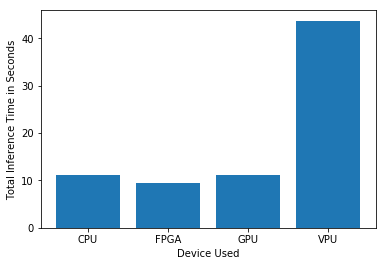

In [51]:
plt.bar(device_list, inference_time)
plt.xlabel("Device Used")
plt.ylabel("Total Inference Time in Seconds")
plt.show()

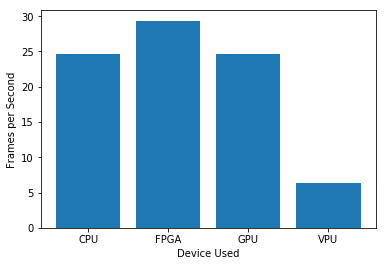

In [52]:
plt.bar(device_list, fps)
plt.xlabel("Device Used")
plt.ylabel("Frames per Second")
plt.show()

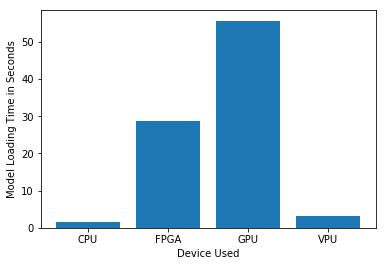

In [53]:
plt.bar(device_list, model_load_time)
plt.xlabel("Device Used")
plt.ylabel("Model Loading Time in Seconds")
plt.show()

# Step 3: Update Proposal Document

Now that you've completed your hardware testing, you should go back to the proposal document and validate or update your originally proposed hardware. Once you've updated your proposal, you can move on to the next scenario.